In [1]:
import os
import torch
import detectron2
from detectron2.utils.logger import setup_logger
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.data.datasets import register_coco_instances

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)


torch:  1.12 ; cuda:  1.12.0
detectron2: 0.6


In [3]:
setup_logger()
register_coco_instances("train_dataset", {},"../dataset/water_corrosion/water_corrosion_result.json", "../dataset/water_corrosion/images")
register_coco_instances("test_dataset", {}, "../dataset/water_corrosion/test/water_corrosion_test.json", "../dataset/water_corrosion/test/images")
register_coco_instances("val_dataset", {}, "../dataset/water_corrosion/test/water_corrosion_test.json", "../dataset/water_corrosion/test/images")

In [4]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("train_dataset", )
cfg.DATASETS.TEST = ("test_dataset",)
cfg.OUTPUT_DIR = '../checkpoints'
cfg.DATALOADER.NUM_WORKERS = 1
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 1  # This is the real "batch size" commonly known to deep learning people
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 100000    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   # The "RoIHead batch size". 128 is faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.



In [5]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()


[11/21 14:20:22 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_2d9806.pkl: 431MB [00:31, 13.8MB/s]                               
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (3, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (3,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (8, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (8,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due 

[11/21 14:20:54 d2.engine.train_loop]: Starting training from iteration 0


/opt/conda/lib/python3.7/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1656352464346/work/aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[11/21 14:21:05 d2.utils.events]:  eta: 9:14:59  iter: 19  total_loss: 2.105  loss_cls: 1.063  loss_box_reg: 0.08047  loss_mask: 0.6915  loss_rpn_cls: 0.1934  loss_rpn_loc: 0.02211  time: 0.3311  data_time: 0.0076  lr: 4.9953e-06  max_mem: 3673M
[11/21 14:21:11 d2.utils.events]:  eta: 9:26:49  iter: 39  total_loss: 1.865  loss_cls: 0.949  loss_box_reg: 0.1634  loss_mask: 0.6892  loss_rpn_cls: 0.03722  loss_rpn_loc: 0.01894  time: 0.3265  data_time: 0.0018  lr: 9.9902e-06  max_mem: 3673M
[11/21 14:21:18 d2.utils.events]:  eta: 9:29:31  iter: 59  total_loss: 1.869  loss_cls: 0.7659  loss_box_reg: 0.08625  loss_mask: 0.6865  loss_rpn_cls: 0.2579  loss_rpn_loc: 0.02427  time: 0.3326  data_time: 0.0062  lr: 1.4985e-05  max_mem: 3775M
[11/21 14:21:25 d2.utils.events]:  eta: 9:32:25  iter: 79  total_loss: 1.363  loss_cls: 0.5247  loss_box_reg: 0.08675  loss_mask: 0.6858  loss_rpn_cls: 0.05237  loss_rpn_loc: 0.04072  time: 0.3374  data_time: 0.0018  lr: 1.998e-05  max_mem: 3775M
[11/21 14:21:3

# validate

In [6]:
from detectron2.engine import DefaultPredictor
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

[11/22 07:55:16 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (256,) (256,) (256,) (256,) (256,64,1,1)        |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (256,) (256,) (256,) (256,) (256,8,3,3)         |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

In [7]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("test_dataset", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "test_dataset")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

WARNING [11/22 07:55:25 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/22 07:55:25 d2.data.datasets.coco]: Loaded 338 images in COCO format from ../dataset/water_corrosion/test/water_corrosion_test.json
[11/22 07:55:25 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/22 07:55:25 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common.NumpySerializedList'>
[11/22 07:55:25 d2.data.common]: Serializing 338 elements to byte tensors and concatenating them all ...
[11/22 07:55:25 d2.data.common]: Serialized dataset takes 0.43 MiB
[11/22 07:55:25 d2.evaluation.evaluator]: Start inference on 338 batches
[11/22 07:55:27 d2.evaluation.evaluator]: Inference done 11/338. Dataloading: 0.0008 s/iter. Inference: 0.1230 s/iter. Eval: 0.0076 s/iter. Total: 0.1315 s/iter. ETA=0:00:42
[11/22 07:5

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:946: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[11/22 07:55:37 d2.evaluation.evaluator]: Inference done 87/338. Dataloading: 0.0134 s/iter. Inference: 0.1166 s/iter. Eval: 0.0029 s/iter. Total: 0.1329 s/iter. ETA=0:00:33
[11/22 07:55:40 d2.utils.memory]: Attempting to copy inputs of <function paste_masks_in_image at 0x7f9193fdf560> to CPU due to CUDA OOM
[11/22 07:55:42 d2.evaluation.evaluator]: Inference done 110/338. Dataloading: 0.0142 s/iter. Inference: 0.1231 s/iter. Eval: 0.0143 s/iter. Total: 0.1516 s/iter. ETA=0:00:34
[11/22 07:55:47 d2.evaluation.evaluator]: Inference done 146/338. Dataloading: 0.0138 s/iter. Inference: 0.1220 s/iter. Eval: 0.0127 s/iter. Total: 0.1485 s/iter. ETA=0:00:28
[11/22 07:55:52 d2.evaluation.evaluator]: Inference done 171/338. Dataloading: 0.0220 s/iter. Inference: 0.1219 s/iter. Eval: 0.0124 s/iter. Total: 0.1564 s/iter. ETA=0:00:26
[11/22 07:55:57 d2.evaluation.evaluator]: Inference done 213/338. Dataloading: 0.0178 s/iter. Inference: 0.1213 s/iter. Eval: 0.0103 s/iter. Total: 0.1494 s/iter. ET

In [17]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("train_dataset", )
cfg.DATASETS.TEST = ("test_dataset",)
cfg.OUTPUT_DIR = '../checkpoints'
cfg.DATALOADER.NUM_WORKERS = 1
cfg.SOLVER.IMS_PER_BATCH = 1  # This is the real "batch size" commonly known to deep learning people
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 100000    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   # The "RoIHead batch size". 128 is faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.
cfg.MODEL.WEIGHTS = '../checkpoints/model_final.pth'  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1   # set a custom testing threshold

predictor = DefaultPredictor(cfg)

WARNING [11/22 07:59:01 d2.checkpoint.c2_model_loading]: Shape of roi_heads.box_predictor.bbox_pred.bias in checkpoint is torch.Size([8]), while shape of roi_heads.box_predictor.bbox_pred.bias in model is torch.Size([4]).
WARNING [11/22 07:59:01 d2.checkpoint.c2_model_loading]: roi_heads.box_predictor.bbox_pred.bias will not be loaded. Please double check and see if this is desired.
WARNING [11/22 07:59:01 d2.checkpoint.c2_model_loading]: Shape of roi_heads.box_predictor.bbox_pred.weight in checkpoint is torch.Size([8, 1024]), while shape of roi_heads.box_predictor.bbox_pred.weight in model is torch.Size([4, 1024]).
WARNING [11/22 07:59:01 d2.checkpoint.c2_model_loading]: roi_heads.box_predictor.bbox_pred.weight will not be loaded. Please double check and see if this is desired.
WARNING [11/22 07:59:01 d2.checkpoint.c2_model_loading]: Shape of roi_heads.box_predictor.cls_score.bias in checkpoint is torch.Size([3]), while shape of roi_heads.box_predictor.cls_score.bias in model is torch

Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (8,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (8, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (3,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (3, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.bias' to the model due to incompatible shapes: (2,) in the checkpoint but (1,) in the model! You might want to

In [8]:
pwd

'/app/notebooks'

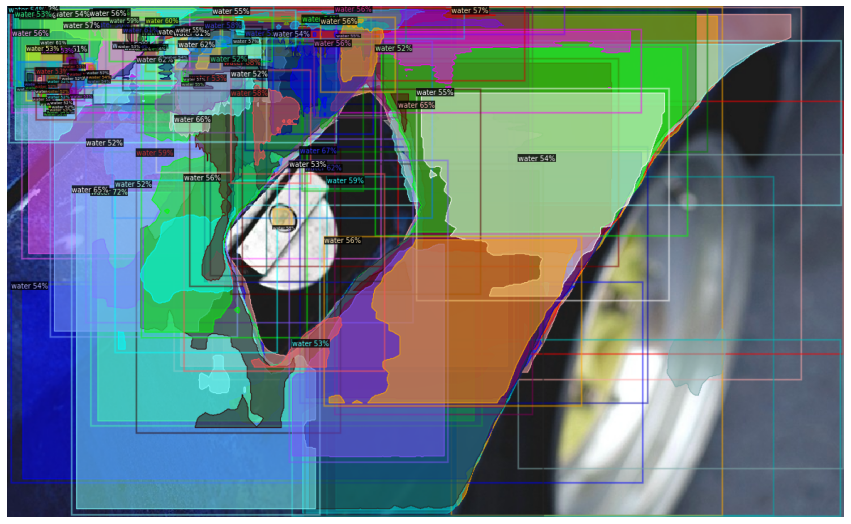

In [19]:
import cv2
from matplotlib import pyplot as plt
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

file_name = '../dataset/water_corrosion/images/01102d05-354.64f825327d531b0064e57579670845ee.jpg'

im = cv2.imread(file_name)
outputs = predictor(im)

# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.figure(figsize=(15,15))
plt.axis("off")
plt.imshow(out.get_image()[:, :, ::-1])
